
# IFCD104 – Tema 3: Comparativa de Optimizadores en Keras (SGD vs Adam vs RMSProp)

**Objetivo:** entrenar el mismo modelo sobre **MNIST** con distintos **optimizadores** y comparar su **pérdida** y **accuracy**.


In [1]:

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers


## 1) Datos

In [2]:

(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
x_train = x_train.astype("float32") / 255.0
x_test  = x_test.astype("float32") / 255.0
x_train = x_train.reshape((-1, 28*28))
x_test  = x_test.reshape((-1, 28*28))

print("Train:", x_train.shape, " Test:", x_test.shape)
num_classes = 10


Train: (60000, 784)  Test: (10000, 784)


## 2) Definir un modelo base (MLP sencillo)

In [3]:

def make_model():
    inputs = keras.Input(shape=(28*28,))
    x = layers.Dense(256, activation='relu')(inputs)
    x = layers.Dropout(0.2)(x)
    x = layers.Dense(128, activation='relu')(x)
    x = layers.Dropout(0.2)(x)
    outputs = layers.Dense(10, activation='softmax')(x)
    return keras.Model(inputs, outputs)

optimizers = {
    "SGD": keras.optimizers.SGD(learning_rate=0.01, momentum=0.0),
    "RMSProp": keras.optimizers.RMSprop(learning_rate=0.001),
    "Adam": keras.optimizers.Adam(learning_rate=0.001),
}

histories = {}
test_scores = {}

for name, opt in optimizers.items():
    model = make_model()
    model.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    h = model.fit(x_train, y_train, validation_split=0.1, epochs=5, batch_size=128, verbose=0)
    histories[name] = h.history
    loss, acc = model.evaluate(x_test, y_test, verbose=0)
    test_scores[name] = (loss, acc)
    print(f"{name}: test_acc={acc:.4f}, test_loss={loss:.4f}")


SGD: test_acc=0.9168, test_loss=0.2978
RMSProp: test_acc=0.9791, test_loss=0.0691
Adam: test_acc=0.9795, test_loss=0.0644


## 3) Curvas de entrenamiento (loss y accuracy)

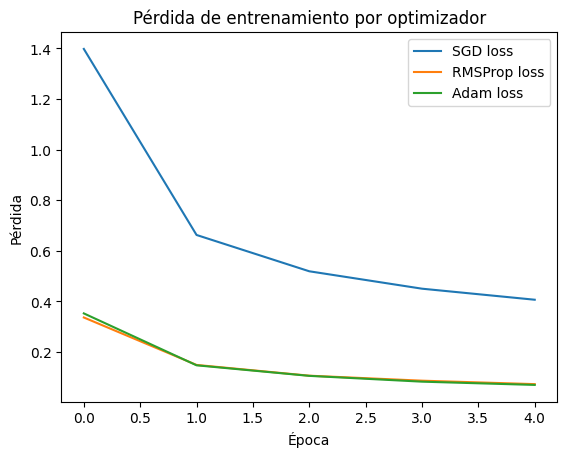

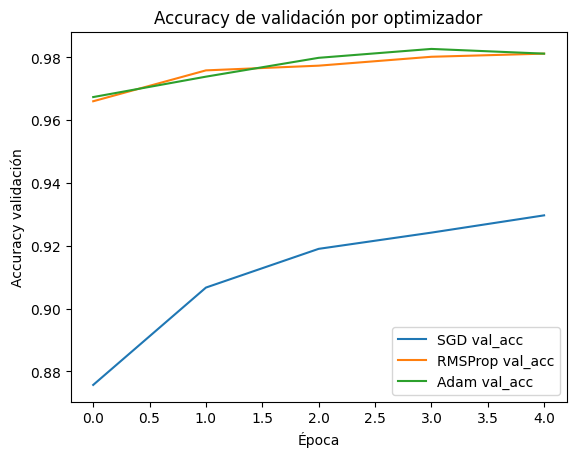

In [6]:

plt.figure()
for name, hist in histories.items():
    plt.plot(hist['loss'], label=f'{name} loss')
plt.xlabel("Época")
plt.ylabel("Pérdida")
plt.title("Pérdida de entrenamiento por optimizador")
plt.legend()
plt.show()

plt.figure()
for name, hist in histories.items():
    plt.plot(hist['val_accuracy'], label=f'{name} val_acc')
plt.xlabel("Época")
plt.ylabel("Accuracy validación")
plt.title("Accuracy de validación por optimizador")
plt.legend()
plt.show()


## 4) Resultados en test

In [5]:

for name, (loss, acc) in test_scores.items():
    print(f"{name:8s} -> test_acc={acc:.4f} | test_loss={loss:.4f}")


SGD      -> test_acc=0.9168 | test_loss=0.2978
RMSProp  -> test_acc=0.9791 | test_loss=0.0691
Adam     -> test_acc=0.9795 | test_loss=0.0644
